In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv('dataset.csv')

In [28]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,02-01-2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,02-01-2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,03-01-2015,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,04-01-2015,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,04-01-2015,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [29]:
data.describe()

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


In [33]:
data.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
arms_category               object
dtype: object

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

In [35]:
data["date"] = pd.to_datetime(data["date"])

C:\Users\Gaurav\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Gaurav\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-01-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Gaurav\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-01-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Gaurav\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-01-2015' in DD/MM/YYYY format. Provide format or sp

In [37]:
data["age"] = data["age"].astype(int)

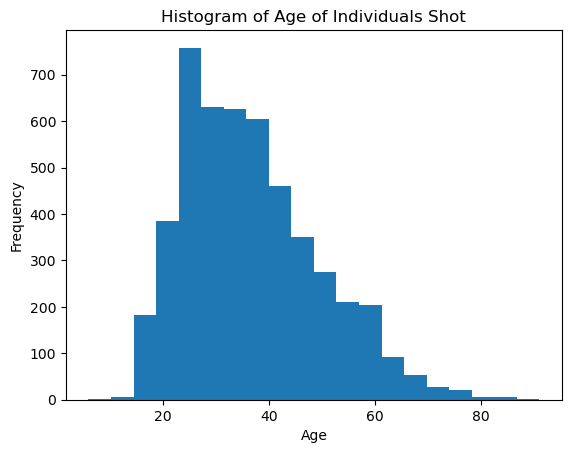

In [56]:
# Plot a histogram of the age of the individuals shot
plt.hist(data['age'], bins=20)  
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age of Individuals Shot')
plt.show()

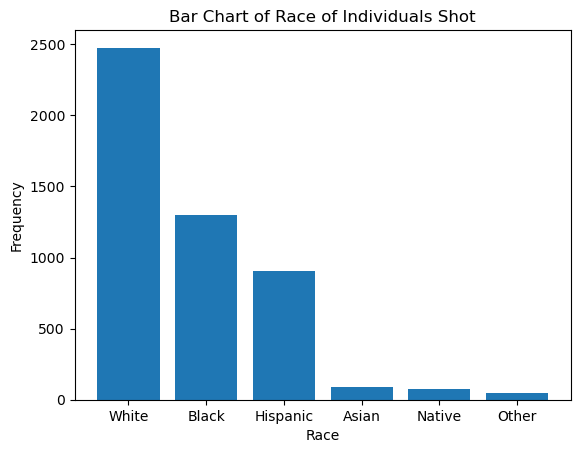

In [59]:
# Plot a bar chart of the race of the individuals shot
plt.bar(data['race'].value_counts().index, data['race'].value_counts())
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.title('Bar Chart of Race of Individuals Shot')
plt.show()

In [66]:
if data.isnull().sum().sum() < 0:
    print("we have some missing values in our dataframe!!")

In [68]:
data.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

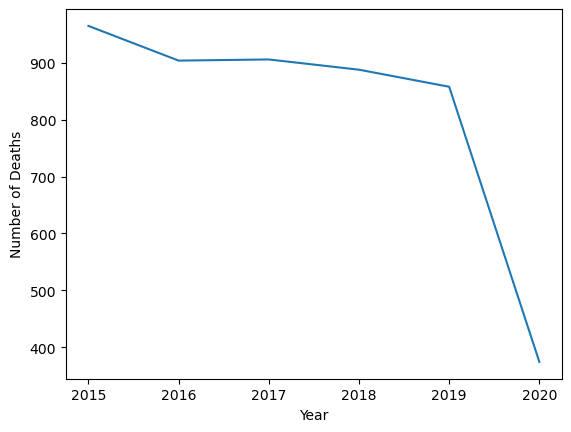

In [72]:
# Extract the year from the date column
data['year'] = data['date'].dt.year

# Group the data by year and calculate the total number of deaths for each year
deaths_by_year = data.groupby(['year'])['manner_of_death'].count()

#Plotting the number of deaths over the years
deaths_by_year.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.show()

In [73]:
data.groupby(['year', data['date'].dt.month])['name'].count()

year  date
2015  1       68
      2       77
      3       86
      4       87
      5       84
              ..
2020  8       10
      9       19
      10       9
      11      11
      12      12
Name: name, Length: 72, dtype: int64

In [74]:
data[data['year'] == 2019].groupby(['year', data['date'].dt.month])['name'].count()

year  date
2019  1       88
      2       61
      3       76
      4       62
      5       80
      6       69
      7       70
      8       44
      9       68
      10      82
      11      68
      12      90
Name: name, dtype: int64

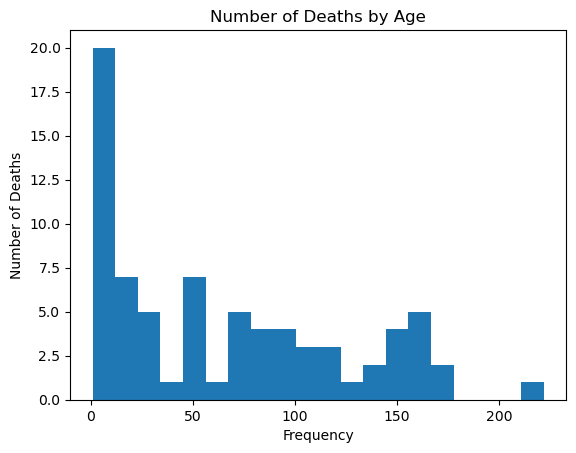

In [77]:
# Group the data by age and calculate the total number of deaths for each age
deaths_by_age = data.groupby(['age'])['name'].count()

# Plot the histogram of the number of deaths by age
plt.hist(deaths_by_age, bins=20)
plt.xlabel('Frequency')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths by Age')
plt.show()

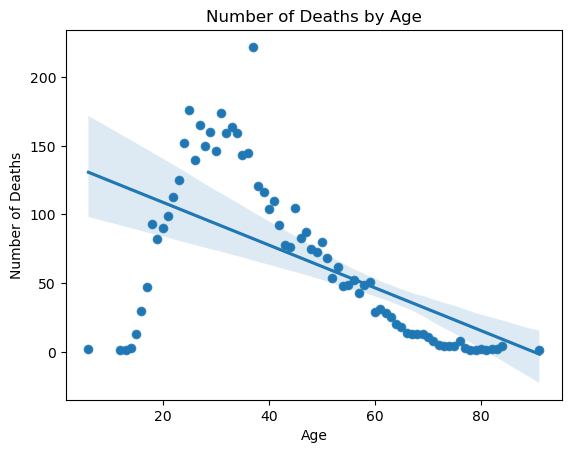

In [80]:
# Group the data by age and calculate the total number of deaths for each age
deaths_by_age = data.groupby(['age'])['name'].count()

# Create a scatter plot of the number of deaths by age
sns.scatterplot(x=deaths_by_age.index, y=deaths_by_age.values)

# Add a regression line to the scatter plot
sns.regplot(x=deaths_by_age.index, y=deaths_by_age.values)

# Add labels and a title to the plot
plt.xlabel('Age')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths by Age')

plt.show()

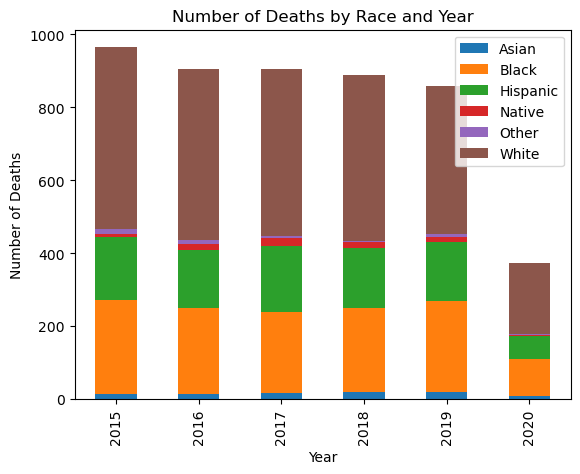

In [88]:
# Group the data by year and race and calculate the total number of deaths for each year and race
deaths_by_race_year = data.groupby(['year', 'race'])['name'].count()

# Reshape the dataframe into a more readable format
deaths_by_race_year = deaths_by_race_year.unstack()

# Plot the bar chart of the number of deaths by race and year
deaths_by_race_year.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths by Race and Year')
plt.legend(loc='upper right')
plt.show()

In [93]:
data.groupby(['year', 'race'])['name'].count().unstack()

race,Asian,Black,Hispanic,Native,Other,White
year,,,,,,
2015,14,258,172,9,15,497
2016,15,234,160,16,11,468
2017,16,224,179,22,6,459
2018,21,229,165,15,4,454
2019,19,250,163,13,9,404
2020,8,103,63,3,3,194


In [96]:
import plotly.express as px

In [103]:
# Group the data by state and calculate the total number of deaths for each state
deaths_by_state = data.groupby(['state'])['name'].count().reset_index(name='counts')

# Create a choropleth map of the statewise shooting data
fig = px.choropleth(deaths_by_state,
                    locations='state',  # DataFrame column with locations
                    locationmode = 'USA-states', # set of locations match entries in `locations`
                    color='counts',  # DataFrame column with color values
                    title='Statewise Shooting Data')
fig.show()